# Project: COVID-19 Vaccination Effectiveness
## Project Description
In this project, we will look at how effective the COVID-19 vaccinations were on factors such as hospitalisations, confirmed cases and mortality rates. 

**Team Members:**
- Geoffrey Pang
- John Porretta
- Cayley Morrow

## Research Questions to Answer

**1.How have COVID-19 vaccines affected? (world comparison)?**
- ICU patient admissions, 
- confirmed cases and 
- mortality rates?
**2.Does a difference in healthcare expenditure affect COVID-19 cases (using WorldBank API)?**
- first world  (Australia, Israel, Sweden, Japan, UK, USA, Singapore)
- second world (Russia, Albania, Serbia, Poland, Romania)
- third world (China, Syria, North Korea, Saudi Arabia, Yemen, Sudan, Burundi, Iran, Vietnam) – based on political and social aspects.
**3.Was lockdown effective?** 
- Death rates in 2020 compared to 2023.
- Countries that had a lockdown vs. those that did not.
**4.Was the Covid19 vaccinations effective in Australia?**
- New Cases vs New Deaths 
- Vaccination vs New Cases
**5.How effective was using different vaccines?**
- Israel (Pfizer only), China (SinoVax, SinoPharm) and Australia (AstraZ, Moderna, Pfizer)

In [1]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

## Our Data sets are taken from this two sources:

**1. One World In Data - contains all the latest Covid19 data from around the world.**
- https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv
- the description of the dataset is given here
https://github.com/owid/covid-19-data/tree/master/public/data
**2. World Bank to get GDP per capita**
- https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information

## Processing Data Set 1: One World in Data

In [2]:
# Reading csv file '../Folder1/your_file.csv' with the actual path to your CSV file
data = pd.read_csv('Data_Files/owid-covid-data.csv')

# Display the first few rows of the DataFrame
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    336078 non-null  object 
 1   continent                                   320099 non-null  object 
 2   location                                    336078 non-null  object 
 3   date                                        336078 non-null  object 
 4   total_cases                                 298424 non-null  float64
 5   new_cases                                   326839 non-null  float64
 6   new_cases_smoothed                          325576 non-null  float64
 7   total_deaths                                277172 non-null  float64
 8   new_deaths                                  326894 non-null  float64
 9   new_deaths_smoothed                         325664 non-null  float64
 

In [4]:
# Get unique values in the iso_code
unique_values = data['iso_code'].unique()
unique_values

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG',
       'ARG', 'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL',
       'BES', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI',
       'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN',
       'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW',
       'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'OWID_ENG', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR',
       'OWID_EUN', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'OWID_HIC', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN',
       'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR',
       'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',

In [5]:
# Get unique values in the iso_code
unique_values = data['location'].unique()
unique_values

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [6]:
# Select the columns that we wanted to work with
covid19_data = data[['location', 'date', 'iso_code','total_cases',
                        'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million',
                         'icu_patients_per_million', 'hosp_patients_per_million', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                         'total_boosters_per_hundred'
                        ]]

covid19_data.head()

,location,date,iso_code,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,Afghanistan,2020-01-03,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Rename the columns using the .rename() method
new_column_names = {
    'location': 'Location',
    'iso_code': 'ISO_Code',
    'date' : 'Date',
    'total_cases': 'Total_Cases',
    'new_cases': 'New_Cases',
    'total_deaths': 'Total_Deaths',
    'new_deaths': 'New_Deaths',
    'total_cases_per_million': 'Total_Cases_PerMillion',
    'new_cases_per_million': 'New_Cases_PerMillion',
    'total_deaths_per_million': 'Total_Deaths_PerMillion',
    'new_deaths_per_million': 'New_Deaths_PerMillion',
    'icu_patients_per_million': 'ICU_Patients_PerMillion',
    'hosp_patients_per_million': 'Hospital_Patients_PerMillion',
    'total_vaccinations_per_hundred': 'Total_Vaccinations_PerHundred',
    'people_vaccinated_per_hundred': 'People_Vaccinated_PerHundred',
    'people_fully_vaccinated_per_hundred': 'People_Fully_Vaccinated_PerHundred',
    'total_boosters_per_hundred': 'Total_Boosters_PerHundred',
    'population_density': 'Population_Density'
}

covid19_data = covid19_data.rename(columns=new_column_names)
covid19_data.head()

,Location,Date,ISO_Code,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Cases_PerMillion,New_Cases_PerMillion,Total_Deaths_PerMillion,New_Deaths_PerMillion,ICU_Patients_PerMillion,Hospital_Patients_PerMillion,Total_Vaccinations_PerHundred,People_Vaccinated_PerHundred,People_Fully_Vaccinated_PerHundred,Total_Boosters_PerHundred
0,Afghanistan,2020-01-03,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,AFG,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## This is our Master Dataset that we can further process per required for the individual plotting.

In [8]:
# This is our Master Dataset that we can further process per required for the individual plotting.
#  Change the Date column to date_time format
covid19_data['Date'] = pd.to_datetime(covid19_data['Date'])
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Location                            336078 non-null  object        
 1   Date                                336078 non-null  datetime64[ns]
 2   ISO_Code                            336078 non-null  object        
 3   Total_Cases                         298424 non-null  float64       
 4   New_Cases                           326839 non-null  float64       
 5   Total_Deaths                        277172 non-null  float64       
 6   New_Deaths                          326894 non-null  float64       
 7   Total_Cases_PerMillion              298424 non-null  float64       
 8   New_Cases_PerMillion                326839 non-null  float64       
 9   Total_Deaths_PerMillion             277172 non-null  float64       
 10  New_Deat

## Processing Data Set 2

In [9]:
## Cayley,you can put all your codes here

## Question 1: How have COVID-19 vaccines affected? (world comparison).
- ICU patient admissions
- confirmed cases
- mortality rates

In [10]:
# John, put your codes here to answer Q1

## Question 2: Does a difference in healthcare expenditure affect COVID-19 cases (using WorldBank API)
- first world (Australia)
- second world (Poland)
- thrid world (Sudan)- based on political and social aspects

In [12]:
#Cayley, put your codes here to answer Q2

## Question 3: Was lockdown effective? 

In [13]:
#John, put your codes here to answer Q3

## Question 4: Was the Covid19 vaccinations effective in Australia?

## Prepare the dataframe
### Question 4a. New Cases vs New Deaths

In [14]:
## Define a function to output based on certain country.
def process_covid19_sum_data(covid19_data, country):
    # Apply filter for rows where 'location' is in the list_of_countries
    filtered_covid19_data = covid19_data[covid19_data['Location'].isin(country)]
    
    # Group by 'date' column and aggregate the specified columns
    grouped = filtered_covid19_data.groupby(filtered_covid19_data['Date'].dt.strftime('%Y-%m')).agg({
        'Total_Cases': 'sum',
        'New_Cases': 'sum',
        'Total_Deaths': 'sum',
        'New_Deaths': 'sum'
    })
    
    # Move the index to a new column ('Month-Year')
    grouped.reset_index(drop=False, inplace=True)
    
    return grouped

country = ['Australia']  # Note the use of square brackets to define a list

# to create a filtered data for another country dataframe, just change Australia to Zimbabwe for example
Australia_grouped_gp1_sum_data = process_covid19_sum_data(covid19_data, country)
Australia_grouped_gp1_sum_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths
0,2020-01,35.0,9.0,0.0,0.0
1,2020-02,478.0,16.0,0.0,0.0
2,2020-03,31988.0,4334.0,231.0,21.0
3,2020-04,186937.0,2387.0,1895.0,74.0
4,2020-05,216814.0,439.0,3204.0,12.0


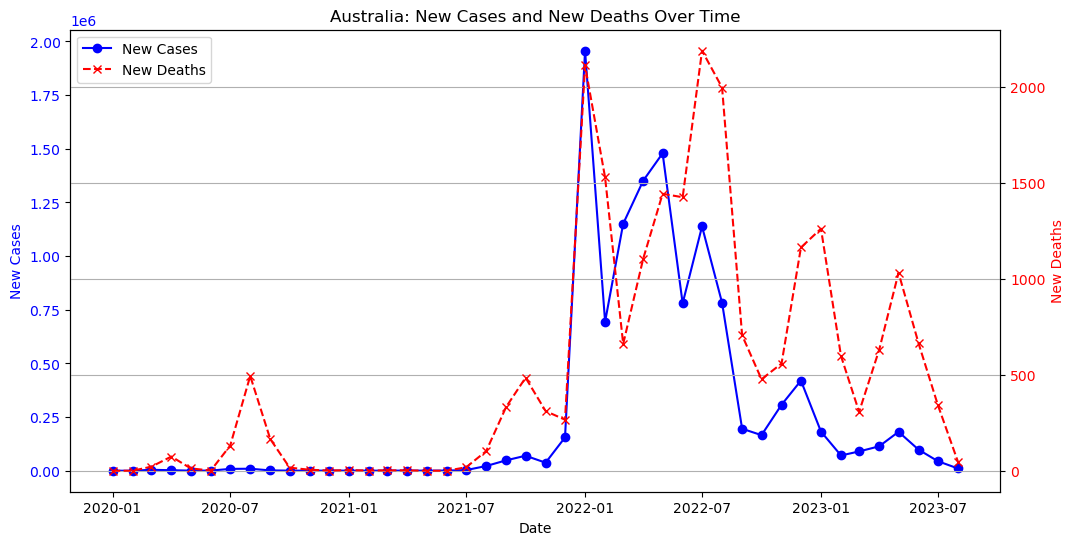

In [15]:
# copy dataframe
df1 = Australia_grouped_gp1_sum_data.copy()

# Convert the 'Date' column to datetime if it's not already in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'newCases' on the left y-axis
ax1.plot(df1['Date'], df1['New_Cases'], label='New Cases', color='b', marker='o', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side for 'newDeaths'
ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['New_Deaths'], label='New Deaths', color='r', marker='x', linestyle='--')
ax2.set_ylabel('New Deaths', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Australia: New Cases and New Deaths Over Time')
plt.grid(True)

plt.show()

**Observation:**
- At least 7 waves are observed based on the New Deaths.
1. 1st Wave: Mar-Apr 2020: Alpha
2. 2nd Wave: Jun-Oct 2020: Beta
3. 3rd Wave: Jun-Oct 2021: Delta
4. 4th (Omnicron) Wave: Nov 21-Feb 22: When Australia open international borders.
5. 5th Wave: July 2022. BA.4.5 and BA.5 which which is Omnicron sub-variants that caused the highest death rate. 
6. 6th wave: end 2022.  Omnicron BA.2 and BA.5 sub-lineages continue to drive transmission.
7. 7th Wave: May 2023.  Omnicron variants XBB.1.5 XBB, XBB.1.16
- Highest Peak coincides with Omnicron variant starting Feb 2022 when Australia open international borders
- Death Peak conincides with New Cases Peaks

In [16]:
## Define a function to output based on certain country.
def process_covid19_sum_mean_data(covid19_data, country):
    # Apply filter for rows where 'location' is in the list_of_countries
    filtered_covid19_data = covid19_data[covid19_data['Location'].isin(country)]
    
    # Group by 'date' column and aggregate the specified columns
    grouped = filtered_covid19_data.groupby(filtered_covid19_data['Date'].dt.strftime('%Y-%m')).agg({
        'Total_Cases': 'sum',
        'New_Cases': 'sum',
        'Total_Deaths': 'sum',
        'New_Deaths': 'sum',
        'People_Fully_Vaccinated_PerHundred': 'mean',
    })
    
    # Move the index to a new column ('Month-Year')
    grouped.reset_index(drop=False, inplace=True)
    
    return grouped

country = ['Australia']  # Note the use of square brackets to define a list

# to create a filtered data for another country dataframe, just change Australia to Zimbabwe for example
Australia_grouped_gp1_sum_mean_data = process_covid19_sum_mean_data(covid19_data, country)
Australia_grouped_gp1_sum_mean_data.head()

,Date,Total_Cases,New_Cases,Total_Deaths,New_Deaths,People_Fully_Vaccinated_PerHundred
0,2020-01,35.0,9.0,0.0,0.0,NaN
1,2020-02,478.0,16.0,0.0,0.0,NaN
2,2020-03,31988.0,4334.0,231.0,21.0,NaN
3,2020-04,186937.0,2387.0,1895.0,74.0,NaN
4,2020-05,216814.0,439.0,3204.0,12.0,NaN


## Prepare the dataframe
### Question 4b. Vaccinations vs New Cases

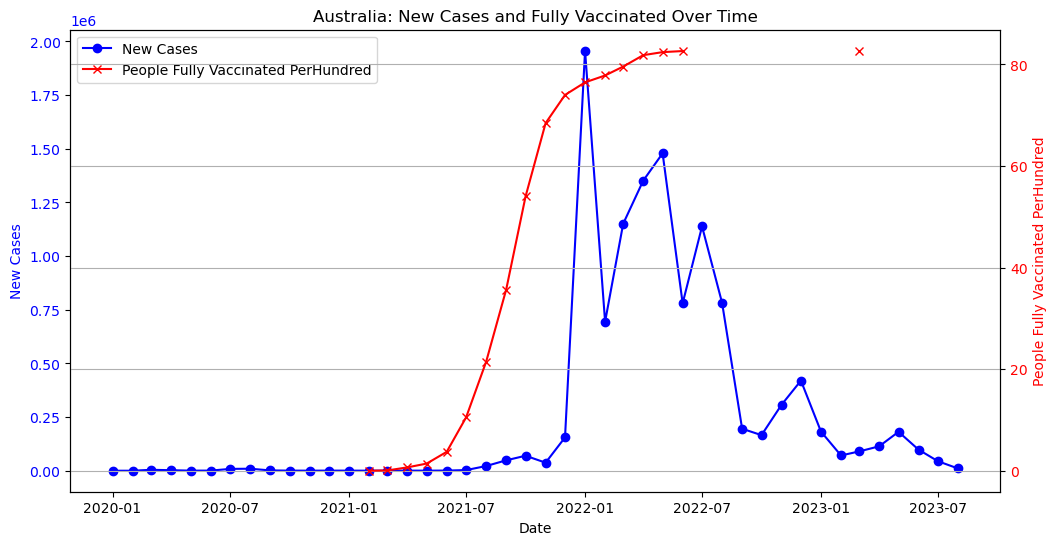

In [17]:
# copy dataframe
df1 = Australia_grouped_gp1_sum_mean_data.copy()

# Convert the 'Date' column to datetime if it's not already in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'newCases' on the left y-axis
ax1.plot(df1['Date'], df1['New_Cases'], label='New Cases', color='b', marker='o', linestyle='-')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis on the right side for 'newDeaths'
ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['People_Fully_Vaccinated_PerHundred'], label='People Fully Vaccinated PerHundred', color='r', marker='x', linestyle='-')
ax2.set_ylabel('People Fully Vaccinated PerHundred', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Australia: New Cases and Fully Vaccinated Over Time')
plt.grid(True)

plt.show()

## Question 5: How effective was the various vaccines?

In [18]:
# Prepare the dataframe
# List of countries to process
countries = ['Australia', 'China', 'Israel']  # Add more countries as needed

# Dictionary to store grouped data for each country
country_grouped_data = {}

# Loop through the list of countries and process COVID-19 data
for country in countries:
    country_data = process_covid19_sum_mean_data(covid19_data, [country])
    country_grouped_data[country] = country_data

# Access the grouped data for each country
Australia_grouped_gp2_data = country_grouped_data['Australia']
China_grouped_gp2_data = country_grouped_data['China']
Israel_grouped_gp2_data = country_grouped_data['Israel']

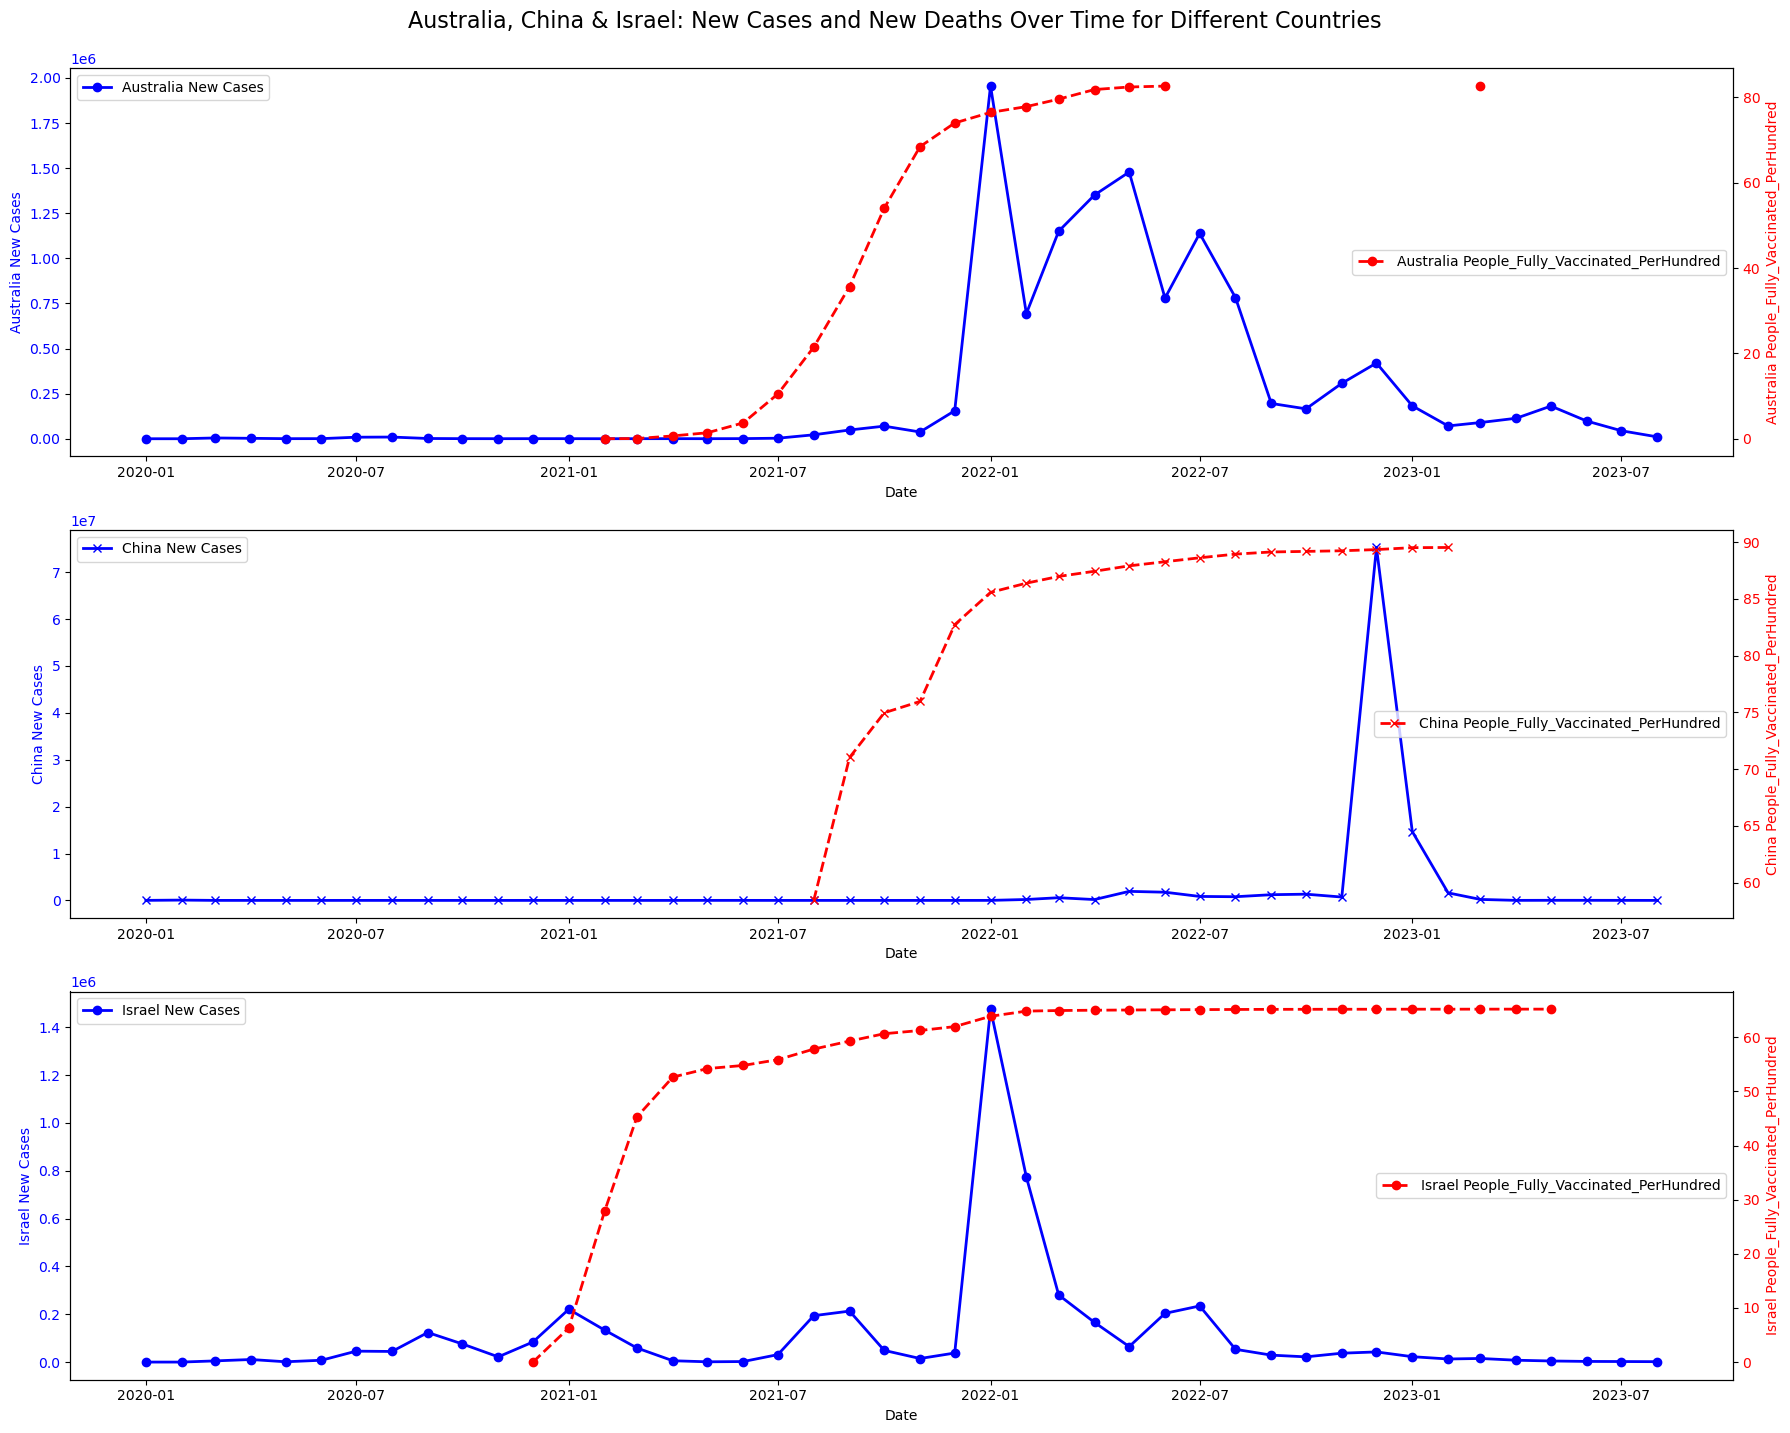

In [19]:
# Copy the DataFrame
df1 = Australia_grouped_gp2_data.copy()
df2 = China_grouped_gp2_data.copy()
df3 = Israel_grouped_gp2_data.copy()

# Assuming you have DataFrames named df1, df2, and df3
# Convert the 'Date' column to datetime if it's not already in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m')
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y-%m')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 14))

# List of DataFrames
dfs = [df1, df2, df3]

# Plot 'newCases' and 'newDeaths' for each country on separate subplots
countries = ['Australia', 'China', 'Israel']
colors1 = ['b', 'b', 'b']
colors2 = ['r', 'r', 'r']
markers = ['o', 'x', 'o']

for i, country in enumerate(countries):
    ax = axes[i]
    df = dfs[i]  # Select the appropriate DataFrame
    ax.plot(df['Date'], df['New_Cases'], label=f'{country} New Cases', color=colors1[i], marker=markers[i], linestyle='-', linewidth=2)
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{country} New Cases', color=colors1[i])
    ax.tick_params(axis='y', labelcolor=colors1[i])
    ax.legend(loc='upper left')
    
    ax2 = ax.twinx()
    ax2.plot(df['Date'], df['People_Fully_Vaccinated_PerHundred'], label=f'{country} People_Fully_Vaccinated_PerHundred', color=colors2[i], marker=markers[i], linestyle='--', linewidth=2)
    ax2.set_ylabel(f'{country} People_Fully_Vaccinated_PerHundred', color=colors2[i])
    ax2.tick_params(axis='y', labelcolor=colors2[i])
    ax2.legend(loc='center right')

# Adjust spacing between subplots
plt.tight_layout()

# Set a super title for the entire figure
fig.suptitle('Australia, China & Israel: New Cases and New Deaths Over Time for Different Countries', y=1.02, fontsize=16)

plt.show()

# Observations:
1. Israel was the first (Dec-20) to vaccinate and achieved 60% fully vaccination within 6 months and continue to vaccinate untilMay-2023.
2. China started late (Aug-21) in their vaccination program but reach close to 90% people fully vaccinated.
3. Australia started in Feb-21 but slower ramping up vaccination.
4.  All the high peak cases are associated with Omnicron variant with China having delayed effect due late borders opening.

# Final Conclusion

1. Vaccination seem to be effective in controlling the spread of the Covid19 virus.
2. Different vaccines work but virus mutates with Omnicron the fastest spreading one.
3. Covid19 spread has more or less been contained.